In [1]:
import os
import sys
sys.path.append(os.path.join(".."))

from models import *

In [3]:
model_regular = MLP(
    architecture=MLPArchitecture(2, [10, 10], 2),
    dataset_name="xor3-balance",
    data_dir="../data",
    activation_func=Tanh(),
    last_layer_activation_func=Softmax(),
    loss_function="cross_entropy",

)
model_regular.train(
    epochs=5000,
    learning_rate=0.001,
    batch=True,
    batch_size=10,
    optimizer="rmsprop",
    rms_beta=0.99,
    save_till_best=True
)

Training from age 0: (best_loss_test: 0.51, loss_test: 0.64) : 100%|██████████| 5000/5000 [00:51<00:00, 96.78it/s] 

--------------------
Reverting to best model at age 4423
Loss on train set: 0.02	Loss on test set: 0.51
--------------------
Model training finished at age 4423 with loss 0.51 on test set


In [6]:
model_l1 = MLP(
    architecture=MLPArchitecture(2, [10, 10], 2),
    dataset_name="xor3-balance",
    data_dir="../data",
    activation_func=Tanh(),
    last_layer_activation_func=Softmax(),
    loss_function="cross_entropy",
    target_precision=1e-4
)
model_l1.train(
    epochs=5000,
    learning_rate=0.001,
    batch=True,
    batch_size=10,
    optimizer="rmsprop",
    rms_beta=0.99,
    regularization="l1",
    reg_lambda=1e-2,
    save_till_best=True
)

Training from age 0: (best_loss_test: 0.229, loss_test: 0.8775): 100%|██████████| 5000/5000 [00:53<00:00, 93.20it/s] 

--------------------
Reverting to best model at age 2090
Loss on train set: 0.0212	Loss on test set: 0.229
--------------------
Model training finished at age 2090 with loss 0.2159 on test set


In [8]:
model_l2 = MLP(
    architecture=MLPArchitecture(2, [10, 10], 2),
    dataset_name="xor3-balance",
    data_dir="../data",
    activation_func=Tanh(),
    last_layer_activation_func=Softmax(),
    loss_function="cross_entropy",
    target_precision=1e-4,
)
model_l2.train(
    epochs=5000,
    learning_rate=0.001,
    batch=True,
    batch_size=10,
    optimizer="rmsprop",
    rms_beta=0.99,
    regularization="l2",
    reg_lambda=1e-3,
    save_till_best=True
)

Training from age 0: (best_loss_test: 0.2319, loss_test: 0.715): 100%|██████████| 5000/5000 [00:53<00:00, 93.73it/s] 

--------------------
Reverting to best model at age 3000
Loss on train set: 0.0068	Loss on test set: 0.2319
--------------------
Model training finished at age 3000 with loss 0.2286 on test set


Model: model
Age: 4423
Train Loss: 0.02
Test Loss: 0.51
Accuracy: 0.885
F1 Score: 0.8824
Model made 708 / 800 correct predictions on the test set.
There were 92 incorrect predictions.


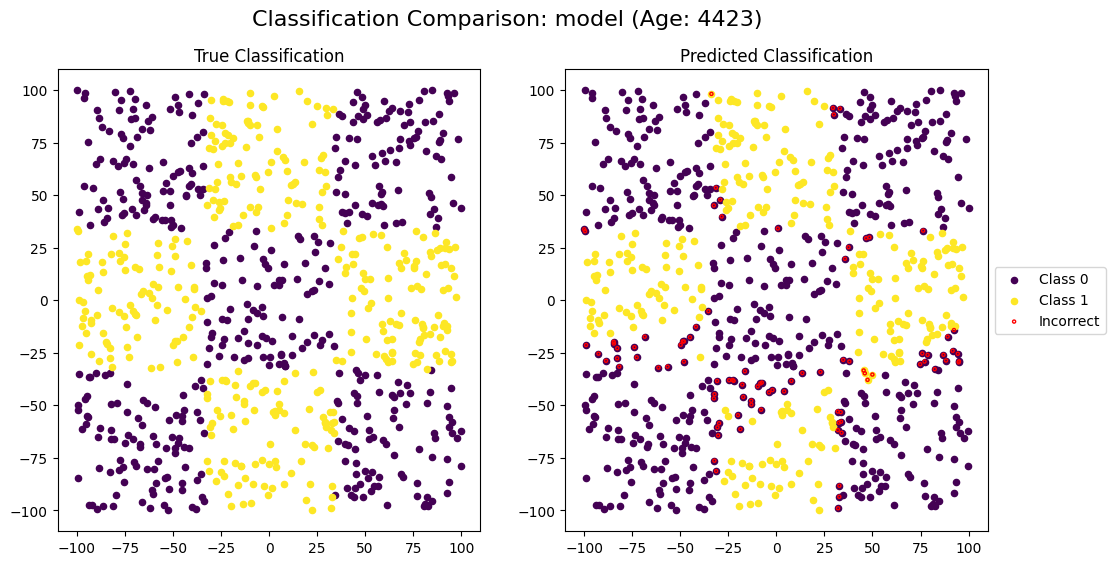

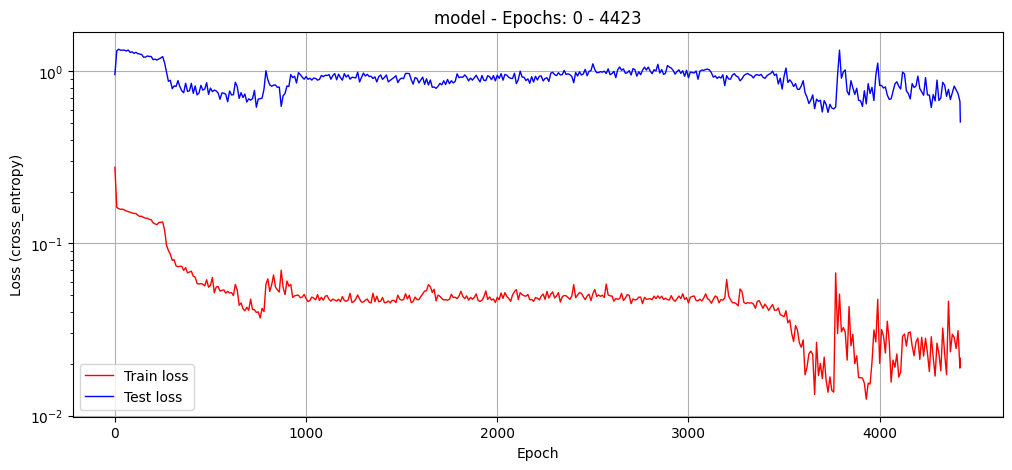

In [4]:
model_regular.plot_classification_comparison()
model_regular.plot_history(smoothing_interval=10)

Model: model
Age: 2090
Train Loss: 0.0082
Test Loss: 0.2159
Accuracy: 0.9363
F1 Score: 0.9357
Model made 749 / 800 correct predictions on the test set.
There were 51 incorrect predictions.


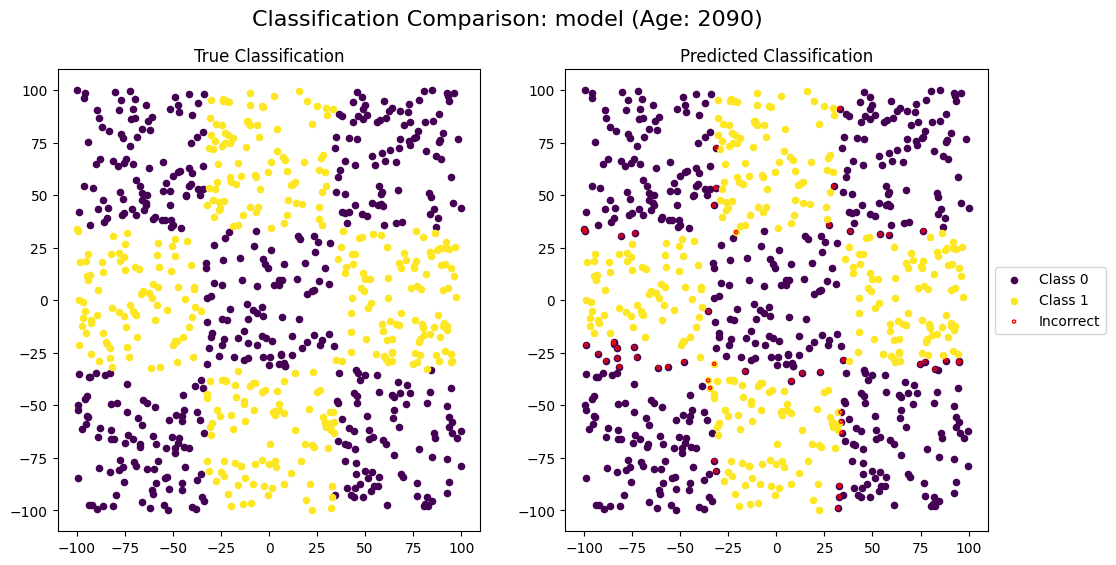

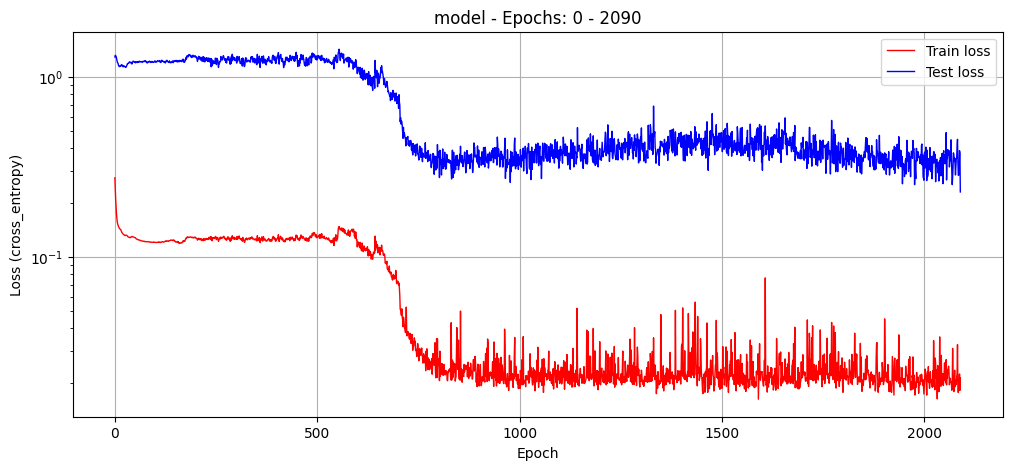

In [7]:
model_l1.plot_classification_comparison()
model_l1.plot_history()

Model: model
Age: 3000
Train Loss: 0.0035
Test Loss: 0.2286
Accuracy: 0.935
F1 Score: 0.9343
Model made 748 / 800 correct predictions on the test set.
There were 52 incorrect predictions.


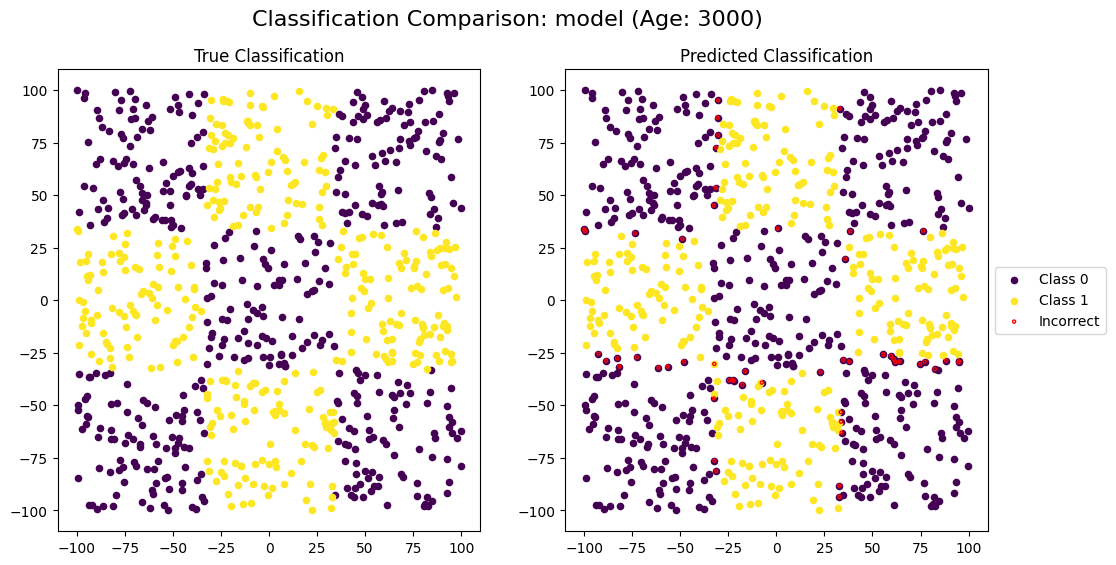

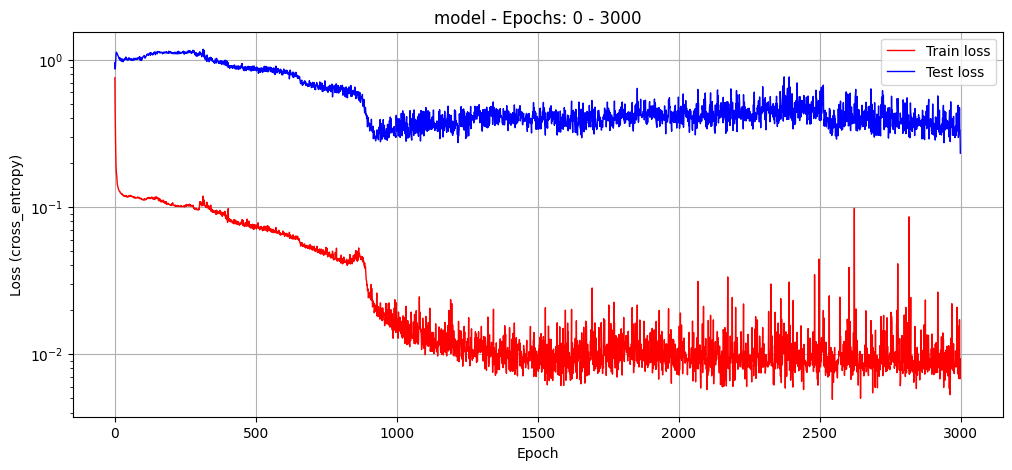

In [9]:
model_l2.plot_classification_comparison()
model_l2.plot_history()